ANÁLISIS NUMÉRICO

La librería numpy es para cálculo numérico, sympy es para cálculo simbólico y matplotlib es para gráficas

In [4]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

In [7]:
x,y,z = sy.symbols('x y z')
x = sy.symbols('x')
f = sy.exp(x)-3*sy.cos(x)
g = sy.series(f,x,0,3)

In [9]:
print (g)

-2 + x + 2*x**2 + O(x**3)


In [10]:
print (f)

exp(x) - 3*cos(x)


In [12]:
orden = g.getO() #Nos da el orden del error
gx = g.removeO() #ELimina el termino que estima la magnitud del error

In [13]:
print (orden)
print (gx)

O(x**3)
2*x**2 + x - 2


lambdify: Convierte expresiones simbolicas de sympy en funciones y la nomenclatura es:

func = sy.lambdify(x,expr).

Ejemplo:

In [14]:
funcsq = sy.lambdify(x,x**2)
funcsq(3)#EL valor tendría que dar 9

9

La funcion lambdify tiene que tener una funcion sin la parte del error

In [16]:
flam = sy.lambdify(x,f)
glam = sy.lambdify(x,gx)

O se puede ver como el error, en el peor de los casos

In [17]:
flam(3)

23.055514412989005

In [18]:
glam(3)

19

Como en este caso el error estaba dado por O(x* *3) esto implica que O numéricamente es 27 pero en el error que observamos tenemos que es aproximadamente 4 por lo que estuve aunque con un error aproximado del 20% es mejor de lo esperado por O

Text(0.5, 1.0, 'Gráfica de la función F(X) contra G(X)')

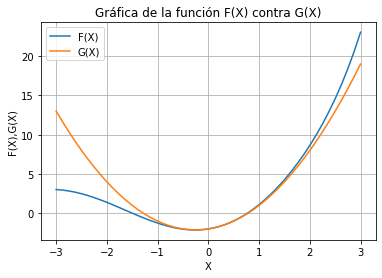

In [33]:
X = np.linspace(-3,3)
YF = flam(X)
YG = glam(X)
plt.plot(X,YF, label = "F(X)")
plt.plot(X,YG, label = "G(X)")
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("F(X),G(X)")
plt.title("Gráfica de la función F(X) contra G(X)")
#Letras mayusculas para numérico, minúsculas para simbólico

Otro ejemplo que podemos usar es graficar el error en los distintos puntos para observar lo explicado en el aterior punto de texto

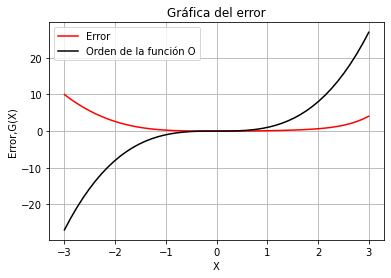

In [34]:
Yerr = np.abs(YF-YG)
Yord = X**3
plt.plot(X,Yerr, label = "Error", color = "Red")
plt.plot(X,Yord, label = "Orden de la función O", color = "Black")
plt.legend(loc=2)
plt.xlabel("X")
plt.ylabel("Error,G(X)")
plt.title("Gráfica del error")
plt.grid(True)

TAREA:

Dada una función f(x) (especificar rango) determinar el orden de la función si requerimos que :

(R_N(x)) < tolerancia (dada).